In [3]:
import pandas as pd  #import all libraries
import matplotlib.pyplot as plt 
import ast
df = pd.read_csv("/Users/jastisarika/Downloads/data_jobs.csv")  #load the csv file
#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [9]:
type(df["job_skills"][2])

list

In [10]:
#how to explode 
df[["job_title_short","job_skills"]]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [12]:
# help(df.explode)

In [16]:
df_exploded = df.explode("job_skills")
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


<Axes: xlabel='job_skills'>

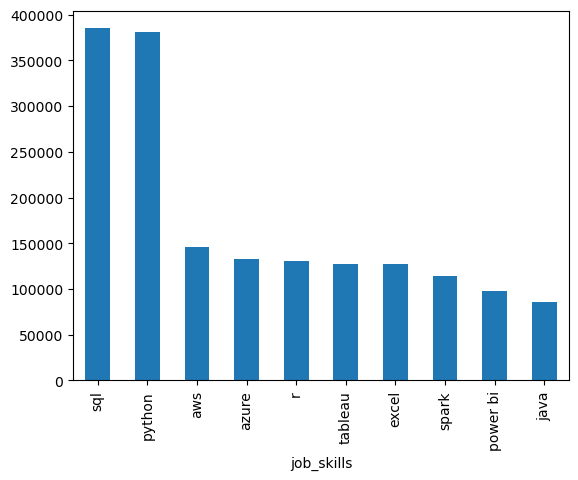

In [17]:
#now plot a graph showing top 10 skills posted for alll data jobs
df_exploded["job_skills"].value_counts().head(10).plot(kind = 'bar')

In [27]:
#now we want to see top 10 skills for particular data job like data analyst
skills_count = df_exploded.groupby(["job_title_short","job_skills"]).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [30]:
# we have to convert this in to a dataframe by giving resetting the index and giving this a name  and also sort htese values 
df_skills_count = skills_count.reset_index(name ="skill_count").sort_values(by="skill_count",ascending = False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [32]:
#now we are going to plot top 10 skillls for data analyst . for that we need individual variables - job_title and top10 skill
job_title = "Data Analyst"
top_skills = 10

df_skills_final = df_skills_count[df_skills_count["job_title_short"]==job_title].head(10)
df_skills_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


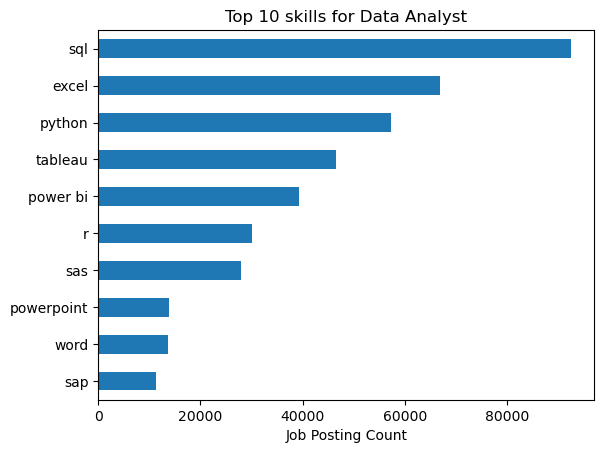

In [38]:
df_skills_final.plot(kind="barh", x="job_skills",y="skill_count")
plt.gca().invert_yaxis()  #we have to reserve this axis by inverting the axis 
plt.title(f"Top {top_skills} skills for {job_title}")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()